**Problema 1 - Fatorial**

In [1]:
def fatorial(num):
  if num > 1:
    return num*fatorial(num-1)
  else:
    return num

num = 200
print(fatorial(num))

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000


In [2]:
def fatorial(num):
  if num > 1:
    return num*fatorial(num-1)
  else:
    return num

num = 200.0
print(fatorial(num))

inf


o programa está reconhecendo como um número infinito, acredito que o armazenamento de memória para números flutuantes seja maior, logo o número ultrapassou a memória de armazenamento e por isso deve ter sido considerado infinito.

**Problema 2 - Equacoes quadraticas**

In [3]:
import numpy as np

a = float(input('a: '))
b = float(input('b: '))
c = float(input('c: '))

delta = b**2-(4*a*c)

x1 = (-b/(2*a))+(np.sqrt(delta)/(2*a))
x2 = (-b/(2*a))-(np.sqrt(delta)/(2*a))

print(x1)
print(x2)

a:  1
b:  2
c:  1


-1.0
-1.0


encontrrei resultados próximos, porém diferentes.

In [4]:
coeff = np.array([a, b, c])
polinomio = np.poly1d(coeff)
raizes = np.roots(polinomio)

print(raizes)

[-1.+6.68896751e-09j -1.-6.68896751e-09j]


**Problema 3 - Calculando derivadas**

In [5]:
import numpy as np

def func(x):
  return x*(x-1)

delt = 10e-2

x = 1

dfdx = (func(x+delt)-func(x))/delt

print(dfdx)

1.100000000000001


o valor correto é 1. pois f'(x) = 2x-1 então f'(1) = 1. O valor possui uma diferença do esperado justamente porque o valor de delta não está tendendo a zero infinitamente. Vamos repetir o procedimento para outros valores:

In [6]:
def derivada(delt, x):
  return (func(x+delt)-func(x))/delt

arr = np.array([10e-4, 10e-6, 10e-8, 10e-10, 10e-12, 10e-14])

for value in arr:
  print(derivada(value, x))

1.0009999999998895
1.0000100000065513
1.0000001005838672
1.000000083740371
1.000000082750371
0.9992007221627407


vemos que quanto mais o valor de delta tende a zero, melhor se torna a aproximação para derivada

**Problema 4 - valocidade de particula**

In [8]:
import math
import matplotlib.pyplot as plt

data = np.loadtxt('velocities.txt')

time = data[:,0]
vel = data[:,1]

N = 200
tamTime = len(time)
tamVel = len(vel)

a, b = time[0], time[tamTime-1]

x = (b-a)/N

somat = 0
for i in range(1, N):
  ponto = math.floor(time[0]+i*x)
  somat += vel[ponto]

At = (x/2)*(vel[0] + vel[tamVel-1] + 2*somat)

print(At)

8.134596999999975


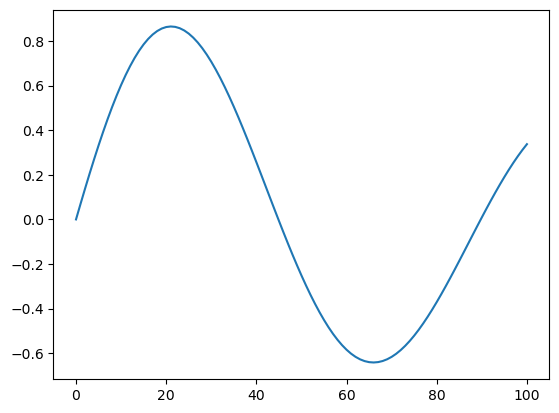

In [9]:
plt.plot(time, vel)
plt.show()

**Problema 5 - calcular o valor de integral**

In [11]:
import numpy as np

def func(x):
  return x**4-2*x+1

N = 1000
a, b = 0, 2

h = (b-a)/N

# regra do trapezio N = 10

soma = 0
for k in range(1, N+1):
  xk = a + (k)*h
  xk_1 = a + (k-1)*h

  soma += func(xk_1)+func(xk)
res_trap = (h/2)*soma

# regra de simpson N = 10

delta = 10e-4
def derivada(delt, x):
  return (func(x+delt)-func(x))/delt

term = derivada(delta, a)-derivada(delta, b)

res_simp = res_trap + (1/12)*(h**2)*term

print(f'trap: {res_trap} and simp: {res_simp}')

trap: 4.400010666665602 and simp: 4.3999999919962685


In [12]:
erro_trap_N10 = 1-4.4/res_trap
erro_simp_N10 = 1-4.4/res_simp

print(f'trap: {res_trap} and simp: {res_simp}\n')
print(f'erro trap: {abs(100*erro_simp_N10)}% e erro simp: {abs(100*erro_simp_N10)}%')

trap: 4.400010666665602 and simp: 4.3999999919962685

erro trap: 1.8190300377085578e-07% e erro simp: 1.8190300377085578e-07%


In [13]:
# o N acima deve ser mudado para 100

erro_trap_N100 = 1-4.4/res_trap
erro_simp_N100 = 1-4.4/res_simp

print(f'trap: {res_trap} and simp: {res_simp}\n')
print(f'erro trap: {abs(100*erro_simp_N100)}% e erro simp: {abs(100*erro_simp_N100)}')

trap: 4.400010666665602 and simp: 4.3999999919962685

erro trap: 1.8190300377085578e-07% e erro simp: 1.8190300377085578e-07


In [14]:
# o N acima deve ser mudado para 1000

erro_trap_N1000 = 1-4.4/res_trap
erro_simp_N1000 = 1-4.4/res_simp

print(f'trap: {res_trap} and simp: {res_simp}\n')
print(f'erro trap: {abs(100*erro_simp_N1000)}% e erro simp: {abs(100*erro_simp_N1000)}')

trap: 4.400010666665602 and simp: 4.3999999919962685

erro trap: 1.8190300377085578e-07% e erro simp: 1.8190300377085578e-07


No exemplo 5.1 do Newman, para trapezio N = 100 temos 4.40107 enquanto usando Simpson temos 4.399991962666667, erro de 1.826e-4.

Já para trapezio N = 1000 temos 4.40107 enquanto usando Simpson temos 4.3999999919962685, erro de 1.819e-07.

Ou seja, ao aumentar o valor de N reduzimos 3 ordens de grandezas para o erro fracional.